In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist, lookup_tools
from fnal_column_analysis_tools.hist import plot


In [5]:
with gzip.open("hists_reoptimization.pkl.gz") as fin:
    hists = pickle.load(fin)

In [6]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [7]:
x = hists['hjetpt']


In [8]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f85f81411d0>


In [9]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')


In [10]:
print(y)


<Hist (process,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f85f81a3c50>


In [11]:
z = y.sum("jetrho")


In [12]:
print(z)


<Hist (process,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f85ce3aa940>


In [13]:
print(z.sum("AK8Puppijet0_N2sdb1").values())


{('Hbb',): array([0.04442631, 0.07195245, 0.06914911, 0.06730691, 0.06455697,
       0.06463706, 0.06162014, 0.06348903, 0.06407639, 0.06442347,
       0.06423658, 0.06546471, 0.06762729, 0.07187236, 0.07350096,
       0.07803971, 0.08084305, 0.08554198, 0.09125546, 0.09857085,
       0.10564595, 0.11277445, 0.12513585, 0.13872539, 0.14988536,
       0.17025632, 0.19094765, 0.22093005, 0.2635676 , 0.31645733,
       0.39553824, 0.5126912 , 0.7031317 , 1.0772578 , 1.846468  ,
       3.082342  , 3.8553698 , 3.0644534 , 1.3659753 , 0.19006659],
      dtype=float32), ('QCD',): array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+

In [14]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [15]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [16]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [17]:
multidim_cumsum(a)

array([[ 9,  2,  3],
       [12,  4,  7],
       [28, 10, 12]])

In [ ]:
k = z.sum("AK8Puppijet0_N2sdb1").values()

In [ ]:
print(k)

In [ ]:
k[('QCD',)]

In [ ]:
multidim_cumsum(k[('QCD',)])

In [22]:
t = z.values(overflow='allnan')


In [ ]:
print(t)

In [ ]:
multidim_cumsum(t[()])

In [23]:
background = multidim_cumsum(t[('QCD',)])

In [18]:
print(background)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.5156641e+00 2.5156641e+00 2.5156641e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.4566739e+01 1.4566739e+01 1.4414137e+01 ... 7.1844548e-02
  0.0000000e+00 0.0000000e+00]
 ...
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]]


In [24]:
signal = multidim_cumsum(t[('Hbb',)])

In [ ]:
print(signal)

In [ ]:
print(a)

In [ ]:
aa = multidim_cumsum(a)

In [ ]:
print(aa)

In [ ]:
print(np.sqrt(aa))

In [28]:
sqrtbkg = np.sqrt(background)

In [ ]:
print(sqrtbkg)

In [ ]:
print(aa)

In [ ]:
print(aa+1)

In [ ]:
print((aa+1)/aa)

In [29]:
soverb = signal/(sqrtbkg+1)

In [ ]:
print(soverb)

In [ ]:
print(np.amax(aa))

In [ ]:
print(np.amax(soverb))

In [ ]:
print(np.argmax(aa))

In [ ]:
print(aa.8)

In [ ]:
print(aa/8)

In [ ]:
print(aa/np.amax(aa))

In [ ]:
print(aa/np.argmax(aa))

In [ ]:
print(soverb/np.amax(soverb))

In [30]:
norm_soverb = soverb/np.amax(soverb)

In [32]:
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2901693e-04 1.2901693e-04 1.2955607e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]]


In [ ]:
print(np.argmax(soverb))

In [ ]:
plt.imshow(signal, cmap='hot', interpolation='nearest')

In [31]:
print(np.amax(norm_soverb))

1.0


In [ ]:
ptbins = np.searchsorted(norm_soverb[:,3], 1.0)

In [ ]:
print(np.unravel_index(norm_soverb.argmax(), norm_soverb.shape))

In [ ]:
plt.imshow(sqrtbkg, cmap='hot', interpolation='nearest')

In [34]:
htemp = z.project("process")

In [35]:
htemp.clear()

In [36]:
htemp.label = '$S/\sqrt{B}$'

In [92]:
htemp._sumw = {():t[('Hbb',)]}

<IPython.core.display.Javascript object>


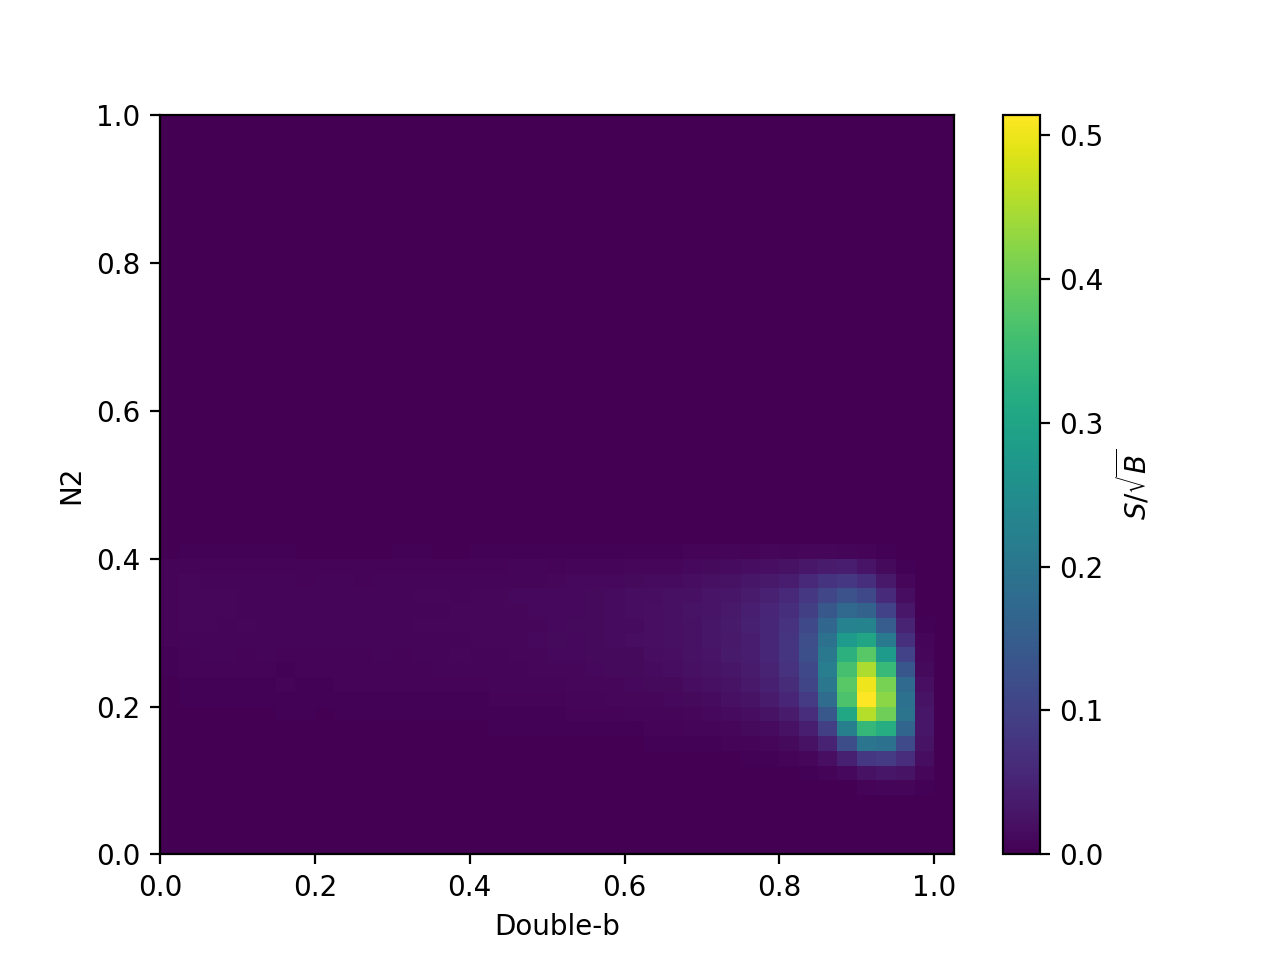

In [93]:
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [94]:
fig.savefig("plots/HBB_N2_ddb.pdf")


In [29]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7f51f9397588>


In [ ]:
print(x_Hbb)

In [49]:
histo = x.sum("AK8Puppijet0_deepdoubleb")
print(histo)
print(histo._axes)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f85cc285ba8>
(<Cat (name=process) instance at 0x7f85ce3aad68>, <Bin (name=AK8Puppijet0_pt) instance at 0x7f85ce329160>, <Bin (name=jetrho) instance at 0x7f85ce329f60>, <Bin (name=AK8Puppijet0_N2sdb1) instance at 0x7f85ce32fc18>)


<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f85ce38c860>


<IPython.core.display.Javascript object>


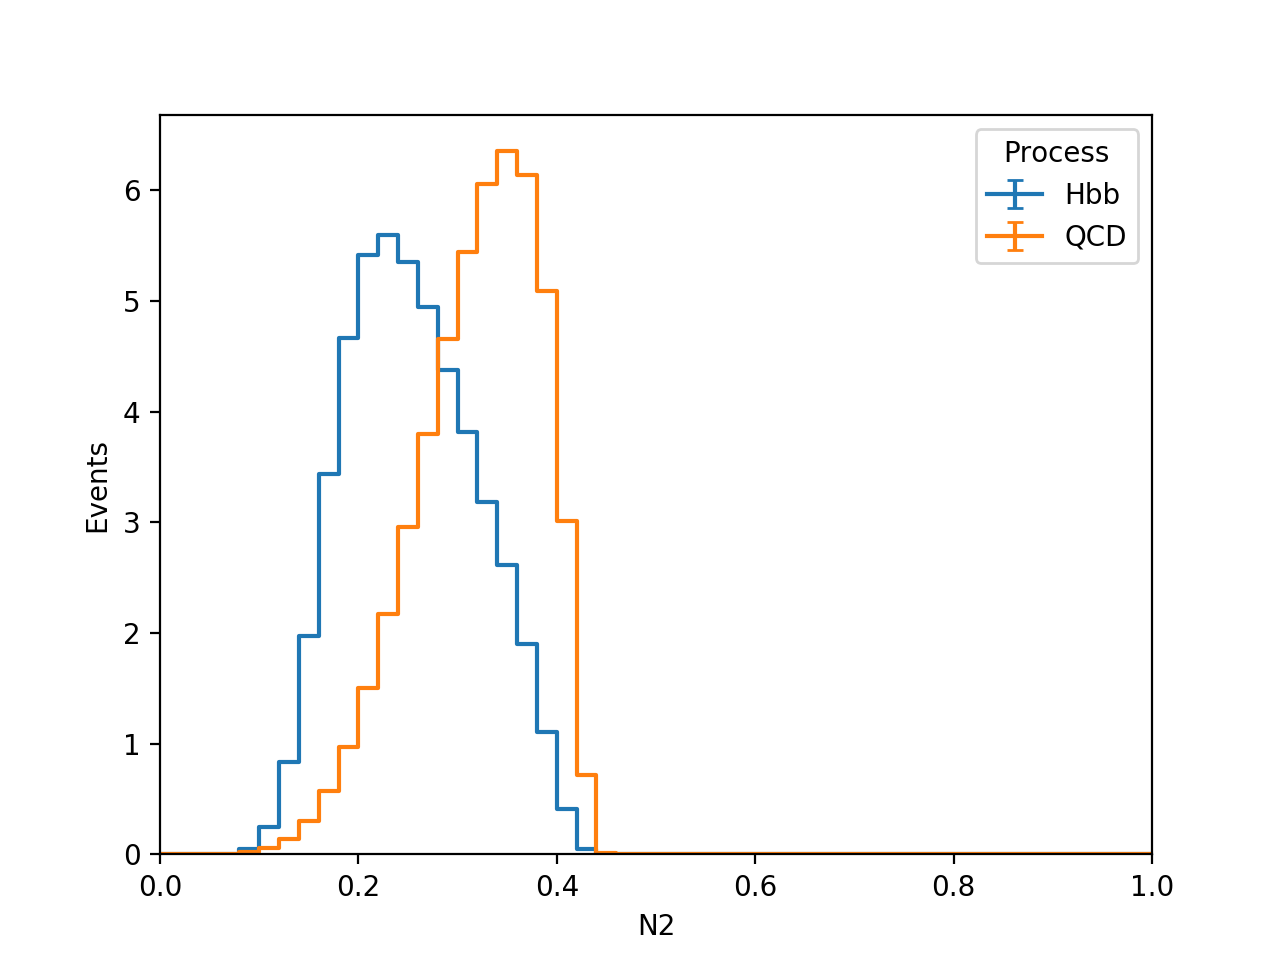

In [50]:
print(histo.sum("process"))
fig, ax, _ = plot.plot1d(histo.sum("AK8Puppijet0_pt").sum("jetrho"),
            overlay="process", error_opts={}, density=True
           )

In [51]:
val_QCD = histo.values(overflow='allnan')[('QCD',)]
val_HBB = histo.values(overflow='allnan')[('Hbb',)]
print(val_QCD)
print(val_HBB)

[[[0.00000000e+00 8.30228188e+05 4.04568984e+04 ... 0.00000000e+00
   0.00000000e+00 1.99678547e+05]
  [0.00000000e+00 8.86049461e+00 9.14822292e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 5.29477406e+00 8.64741516e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 5.71461737e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.85730863e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 8.29022408e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 8.86296094e+04]]

 [[0.00000000e+00 1.49011279e+04 7.60677307e+02 ... 0.00000000e+00
   0.00000000e+00 3.78577100e+03]
  [0.00000000e+00 0.00000000e+00 1.43268317e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.43268317e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000

In [ ]:
np.cumsum(val_QCD, axis=2)

In [ ]:
print(a)

In [ ]:
numpy.cumsum(a)

In [ ]:
np.cumsum(val_QCD, axis=2)

In [52]:
qcd_maxval_temp = np.cumsum(val_QCD, axis=2)
hbb_maxval_temp = np.cumsum(val_HBB, axis=2)

In [53]:
print(hbb_maxval_temp)

[[[0.00000000e+00 1.08430600e+00 1.17924583e+00 ... 3.91827126e+01
   3.91827126e+01 3.94907074e+01]
  [0.00000000e+00 0.00000000e+00 2.66984971e-05 ... 3.51672620e-01
   3.51672620e-01 3.51672620e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56958896e-01
   3.56958896e-01 3.56958896e-01]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.63646078e+00
   4.63646078e+00 4.63646078e+00]
  [0.00000000e+00 0.00000000e+00 5.33969942e-05 ... 2.64535122e+01
   2.64535122e+01 2.64535122e+01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 1.95406303e-01]]

 [[0.00000000e+00 2.20796578e-02 2.39485521e-02 ... 6.04961276e-01
   6.04961276e-01 6.09953880e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67223721e-03
   4.67223721e-03 4.67223721e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.51204553e-03
   4.51204553e-03 4.51204553e-03]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.28579944e-01
   1.28579

In [56]:
qcd_maxval = qcd_maxval_temp[:,:,-1]
hbb_maxval = hbb_maxval_temp[:,:,-1]

In [57]:
norma = qcd_maxval_temp / np.maximum(1e-10,qcd_maxval[:,:,np.newaxis])
norma2 = hbb_maxval_temp / np.maximum(1e-10,hbb_maxval[:,:,np.newaxis])
print(norma2)

[[[0.0000000e+00 2.7457245e-02 2.9861350e-02 ... 9.9220085e-01
   9.9220085e-01 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 7.5918615e-05 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 2.0185219e-06 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 1.0000000e+00]]

 [[0.0000000e+00 3.6198895e-02 3.9262891e-02 ... 9.9181479e-01
   9.9181479e-01 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [58]:
print(norma2)

[[[0.0000000e+00 2.7457245e-02 2.9861350e-02 ... 9.9220085e-01
   9.9220085e-01 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 7.5918615e-05 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 2.0185219e-06 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   0.0000000e+00 1.0000000e+00]]

 [[0.0000000e+00 3.6198895e-02 3.9262891e-02 ... 9.9181479e-01
   9.9181479e-01 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
   1.0000000e+00 1.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.000

In [59]:
hist_y_QCD = histo.sum("process")
hist_y_HBB = histo.sum("process")

In [60]:
print(hist_y_HBB)
print(hist_y_QCD)
axn2 = hist_y_HBB._axes[2]
print(axn2.edges())

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f85cc1e79b0>
<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f85cc1e7550>
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [61]:
hist_y_QCD.clear()
hist_y_HBB.clear()

In [62]:
hist_y_QCD._sumw = {():norma}
hist_y_HBB._sumw = {():norma2}


In [64]:
with gzip.open("n2quantile_QCD.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_QCD, fout, protocol=2)  # for python2 compatibility


In [65]:
with gzip.open("n2quantile_HBB.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_HBB, fout, protocol=2)

<IPython.core.display.Javascript object>


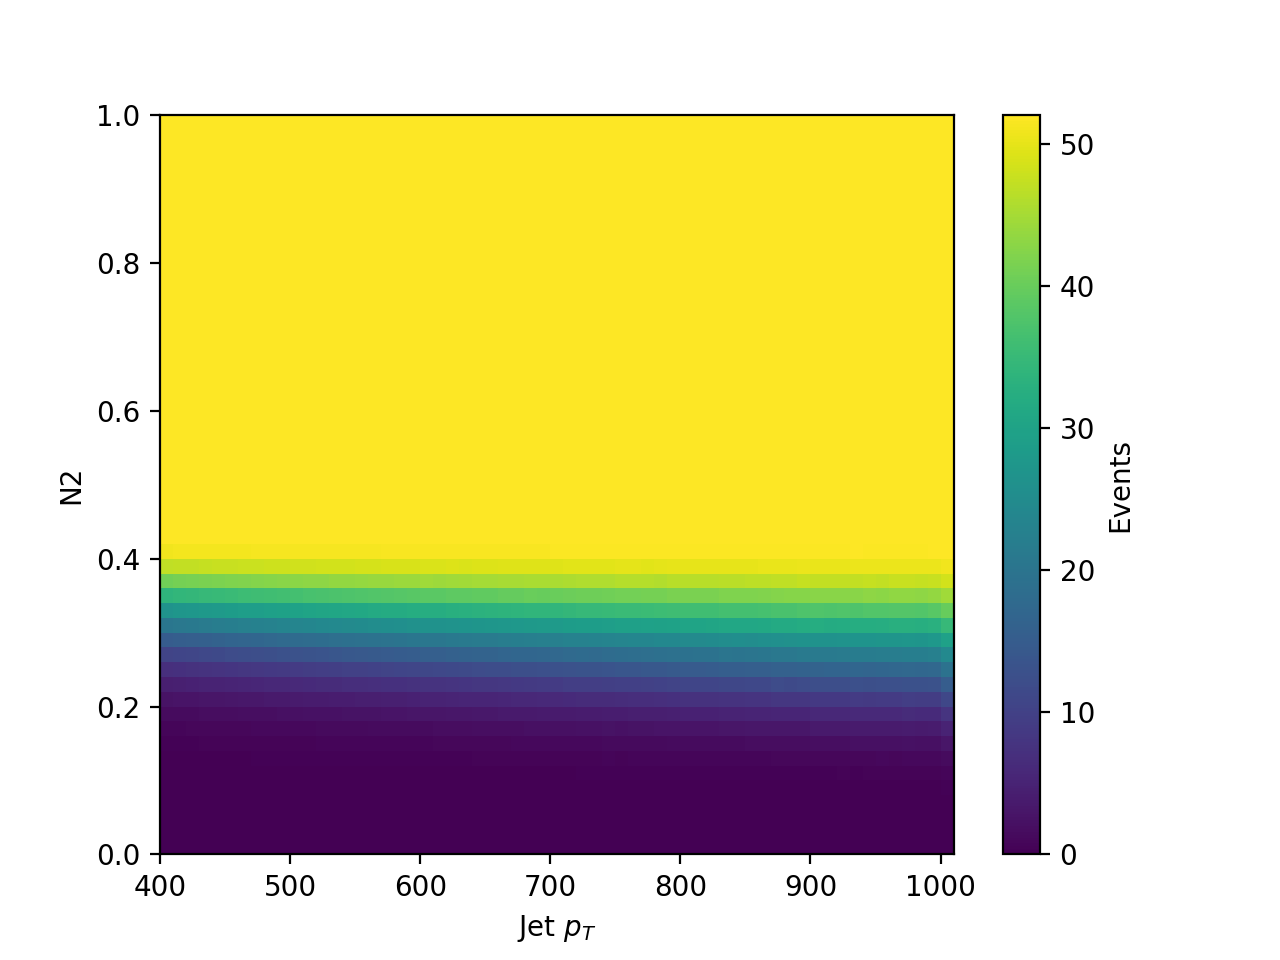

In [96]:
fig, ax, _ = plot.plot2d(hist_y_QCD.sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})
fig.savefig("plots/QCD_cdf_integratedrho.pdf")


<IPython.core.display.Javascript object>


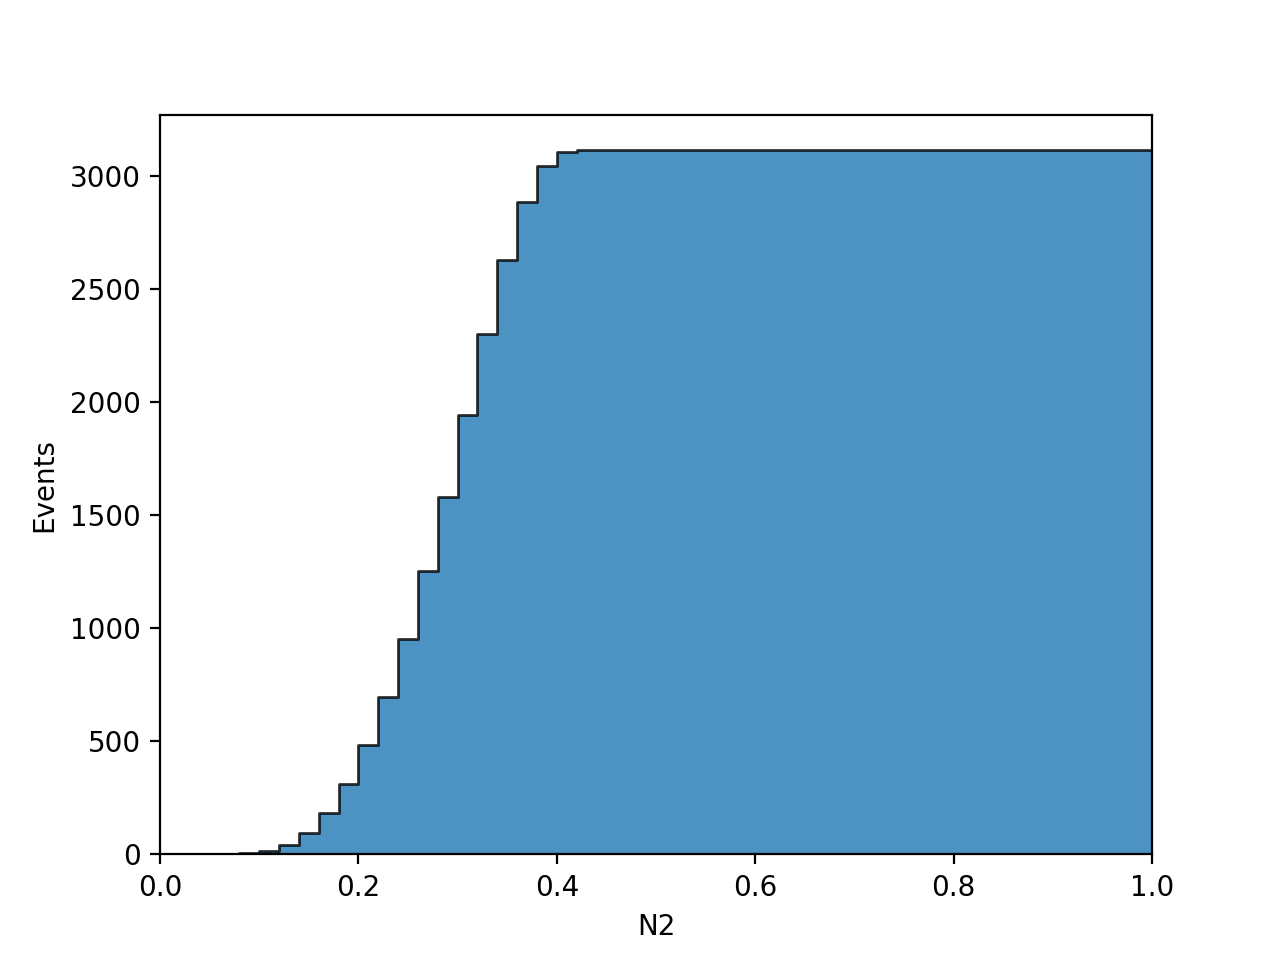

In [90]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig6, ax, _ = plot.plot1d(hist_y_HBB.sum("AK8Puppijet0_pt").sum("jetrho"), stack=True, fill_opts=fill_opts)
fig6.savefig("plots/HBB_cdf_1d.pdf")



In [ ]:
np.flip(bins,0)

In [ ]:
np.flip(bins,1)

In [ ]:
print(bins)

In [22]:
bins = tuple(ax.edges() for ax in hist_y_HBB.axes())

In [ ]:
print(hist_y_HBB.axes())

In [ ]:
print(hist_y_HBB.axes()[2])

In [67]:
n2q_array = hist_y_HBB.values()[()]
print(hist_y_HBB)

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7f85cc1e79b0>


In [68]:
n2q_array[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00571429,
       0.01714286, 0.02857143, 0.05142857, 0.06857143, 0.13142857,
       0.18285714, 0.34285712, 0.5542857 , 0.7657143 , 0.92      ,
       0.98857147, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [69]:
bins = tuple(ax.edges() for ax in hist_y_HBB.axes())


In [70]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [74]:
extractor = lookup_tools.extractor()
extractor.add_weight_sets(["* * correction_files/n2ddt_transform_2017MC.root"])
extractor.finalize()
evaluator = extractor.make_evaluator()

In [75]:
evaluator._functions['N2quantile'] = lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

In [76]:
dl =  lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

In [80]:
evaluator["N2quantile"](400,-5.99,0.2)

0.017142856

In [81]:
len(dl._axes)


3

In [82]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._axes

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
         490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
         580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
         670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
         760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
         850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
         940.,  950.,  960.,  970.,  980.,  990., 1000.]),
 array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
        -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
        -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
        -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
        -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
        -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
        -2.4  , -2.325, -2.25 , -2.175, -2.1  ]),
 array([0.  , 0.02, 0.04, 0.06, 0

In [ ]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension

In [ ]:
range(lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension)

In [ ]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._values.shape[0]

In [ ]:
print(n2q_array)

In [ ]:
print(n2q_array)

In [ ]:
np.searchsorted(dl._axes[0], 411, side='right')

In [ ]:
dl._values.shape[0]